In [1]:
 #Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')


In [28]:
# Loading dataset
train = pd.read_csv("/kaggle/input/brist1d/train.csv", low_memory=False)
test = pd.read_csv("/kaggle/input/brist1d/test.csv", low_memory=False)
sample = pd.read_csv("/kaggle/input/brist1d/sample_submission.csv", low_memory=False)

## Data Preprocessing Summary

### **1. Mapping `p_num` to Numeric Values**  
The `p_num` column, which contains categorical identifiers, is mapped to unique integer values. This makes the column suitable for machine learning models that require numerical input.

### **2. Dropping the id Column**
The id column, which serves as a unique identifier, is removed if it exists, as it does not provide predictive value for modeling.

### Purpose:
- Mapping p_num: Converts categorical data into a numerical format.
- Dropping id: Removes redundant columns that don't contribute to predictions.

In [29]:
# Assuming train is a DataFrame
mapping_dict = {p: idx for idx, p in enumerate(train['p_num'].unique())}

# Map p_num and process time directly
train['p_num'] = train['p_num'].map(mapping_dict)
# Drop the 'id' column if it exists
if 'id' in train.columns:
    train.drop(columns=['id'], inplace=True)

In [30]:
import pandas as pd

# Assuming train is a DataFrame
mapping_dict = {p: idx for idx, p in enumerate(test['p_num'].unique())}

# Map p_num and process time directly
test['p_num'] = test['p_num'].map(mapping_dict)


if 'id' in test.columns:
    test.drop(columns=['id'], inplace=True)

### Data Preprocessing 

#### **1. Converting `time` to Datetime Format**  
The `time` column, which contains date and time information, is converted to the `datetime` format. This ensures that we can perform time-based operations such as extracting hours or calculating cyclical features. Invalid entries in the `time` column are converted to `NaT` (Not a Time) to prevent errors.#

### **2. Creating Time-Based Features: `sin_hour` and `cos_hour`**  
To capture the cyclical nature of the hours in a day, two new features are created: `sin_hour` and `cos_hour`. These features are generated by applying sine and cosine transformations to the hour of the day. This encoding preserves the cyclical nature of time (i.e., 23:00 is close to 00:00#).

### **3. Dropping the `time` Column**  
After generating the `sin_hour` and `cos_hour` features, the original `time` column is dropped, as the new features now encode the necessary time-related information for mo#deling.

### Purpose:
- Converting `time` to `datetime`: Allows for easy manipulation and extraction of time-based information.
- Creating `sin_hour` and `cos_hour`: Encodes the cyclical nature of time for better model performance.
- Dropping `time`: Removes redundant columns after transforming them into meaningful features.


In [31]:
# Ensure 'time' is in datetime format
train['time'] = pd.to_datetime(train['time'], errors='coerce')# Convert to datetime, invalid entries become NaT
test['time'] = pd.to_datetime(test['time'], errors='coerce')  # Apply to test as well

# Now you can safely use the .dt accessor
train["sin_hour"] = np.sin(np.pi * train['time'].dt.hour / 12)
train["cos_hour"] = np.cos(np.pi * train['time'].dt.hour / 12)

test["sin_hour"] = np.sin(np.pi * test['time'].dt.hour / 12)
test["cos_hour"] = np.cos(np.pi * test['time'].dt.hour / 12)


train = train.drop('time' , axis = 1)
test = test.drop('time' , axis = 1)

### Data Preprocessing Summary

#### **1. Dropping Columns with High Percentage of Missing Values**  
A function `drop_columns_with_high_nan` is implemented to drop columns from the dataset that have more than a specified threshold (default 25%) of missing values. This step helps in cleaning the dataset by removing columns that are largely incomplete and may not contribute meaningfully to the model#.

### **2. Function Details:**
- **Input:** 
    - The function takes the input DataFrame (`df`) and a threshold value to determine the percentage of missing values.
    - Default threshold is set to 25% (0.25).
- **Output:** 
    - It returns two objects: the cleaned DataFrame (with the problematic columns dropped) and a list of the column names that were dropped due to having too many missi#ng val

### **3. Purpose:**
- Removing columns with a high percentage of missing values ensures that the model does not learn from incomplete or irrelevant data, improving overall performance and reducing noise.
- The `threshold` parameter can be adjusted depending on how strict you want to be regarding missing data.


In [32]:
def drop_columns_with_high_nan(df, threshold=0.5):
    """
    Drops columns from the DataFrame if they have more than a specified
    percentage of missing values and returns the names of these columns.

    Parameters:
        df (pd.DataFrame): The input DataFrame.
        threshold (float): The percentage threshold for missing values (default is 50%).

    Returns:
        tuple: 
            - pd.DataFrame: The DataFrame with columns having more than `threshold`% missing values dropped.
            - list: Names of the columns that were dropped.
    """
    # Calculate the threshold count for missing values
    missing_threshold = len(df) * threshold

    # Identify columns with more missing values than the threshold
    high_nan_columns = df.columns[df.isnull().sum() > missing_threshold].tolist()

    # Drop the identified columns
    cleaned_df = df.drop(columns=high_nan_columns)

    return cleaned_df, high_nan_columns

In [33]:
# Apply the function
train_cleaned, dropped_columns = drop_columns_with_high_nan(train, threshold=0.5)


print("\nDropped Columns:")
print(dropped_columns)

print("Cleaned DataFrame:")
train_cleaned.head()


Dropped Columns:
['carbs-5:55', 'carbs-5:50', 'carbs-5:45', 'carbs-5:40', 'carbs-5:35', 'carbs-5:30', 'carbs-5:25', 'carbs-5:20', 'carbs-5:15', 'carbs-5:10', 'carbs-5:05', 'carbs-5:00', 'carbs-4:55', 'carbs-4:50', 'carbs-4:45', 'carbs-4:40', 'carbs-4:35', 'carbs-4:30', 'carbs-4:25', 'carbs-4:20', 'carbs-4:15', 'carbs-4:10', 'carbs-4:05', 'carbs-4:00', 'carbs-3:55', 'carbs-3:50', 'carbs-3:45', 'carbs-3:40', 'carbs-3:35', 'carbs-3:30', 'carbs-3:25', 'carbs-3:20', 'carbs-3:15', 'carbs-3:10', 'carbs-3:05', 'carbs-3:00', 'carbs-2:55', 'carbs-2:50', 'carbs-2:45', 'carbs-2:40', 'carbs-2:35', 'carbs-2:30', 'carbs-2:25', 'carbs-2:20', 'carbs-2:15', 'carbs-2:10', 'carbs-2:05', 'carbs-2:00', 'carbs-1:55', 'carbs-1:50', 'carbs-1:45', 'carbs-1:40', 'carbs-1:35', 'carbs-1:30', 'carbs-1:25', 'carbs-1:20', 'carbs-1:15', 'carbs-1:10', 'carbs-1:05', 'carbs-1:00', 'carbs-0:55', 'carbs-0:50', 'carbs-0:45', 'carbs-0:40', 'carbs-0:35', 'carbs-0:30', 'carbs-0:25', 'carbs-0:20', 'carbs-0:15', 'carbs-0:10', '

,p_num,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,bg-5:15,...,cals-0:30,cals-0:25,cals-0:20,cals-0:15,cals-0:10,cals-0:05,cals-0:00,bg+1:00,sin_hour,cos_hour
0,0,NaN,NaN,9.6,NaN,NaN,9.7,NaN,NaN,9.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.4,1.000000,6.123234e-17
1,0,NaN,NaN,9.7,NaN,NaN,9.2,NaN,NaN,8.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.8,1.000000,6.123234e-17
2,0,NaN,NaN,9.2,NaN,NaN,8.7,NaN,NaN,8.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.5,1.000000,6.123234e-17
3,0,NaN,NaN,8.7,NaN,NaN,8.4,NaN,NaN,8.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.8,1.000000,6.123234e-17
4,0,NaN,NaN,8.4,NaN,NaN,8.1,NaN,NaN,8.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.7,0.965926,-2.588190e-01


### Data Preprocessing Summary
#
### **1. Applying Column Removal from Train to Test Data**  
The function `apply_column_removal_to_test` is designed to remove columns with a high percentage of missing values from the test data, based on the columns removed from the training data. This ensures consistency between the train and test datasets by keeping only the relevant features.#

### **2. Function Details:**
- **Input:** 
    - The function accepts two DataFrames, `train_df` (training data) and `test_df` (test data), along with a threshold parameter to determine the percentage of missing values.
    - The default threshold is set to 25% (0.25).
- **Output:** 
    - The function returns two objects: the cleaned test DataFrame (with the same columns removed as in the training data) and a list of the columns that were dropped from the test# dat
### **3. Purpose:**
- This step ensures that the test data remains consistent with the train data by applying the same column removal logic to both datasets.
- The dropped columns are those that have more than the specified threshold percentage of missing values in the training data. These columns are also removed from the test set to maintain feature alignment.



In [34]:
def apply_column_removal_to_test(train_df, test_df, threshold=0.5):
    """
    Applies column removal based on NaN threshold from train data to test data.
    
    Parameters:
        train_df (pd.DataFrame): The training DataFrame.
        test_df (pd.DataFrame): The test DataFrame.
        threshold (float): The percentage threshold for missing values (default is 50%).

    Returns:
        tuple:
            - pd.DataFrame: Cleaned test DataFrame with columns dropped.
            - list: Names of the columns dropped from the test data.
    """
    # Drop columns in train data and get the names of dropped columns
    _, high_nan_columns_train = drop_columns_with_high_nan(train_df, threshold)

    # Remove the same columns from test data
    cleaned_test_df = test_df.drop(columns=high_nan_columns_train, errors='ignore')

    return cleaned_test_df, high_nan_columns_train

In [35]:
# Apply the function
test_cleaned, dropped_columns = apply_column_removal_to_test(train, test, threshold=0.5)



print("\nDropped Columns from Test Data:")
print(dropped_columns)

print("Cleaned Test DataFrame:")
test_cleaned.head()


Dropped Columns from Test Data:
['carbs-5:55', 'carbs-5:50', 'carbs-5:45', 'carbs-5:40', 'carbs-5:35', 'carbs-5:30', 'carbs-5:25', 'carbs-5:20', 'carbs-5:15', 'carbs-5:10', 'carbs-5:05', 'carbs-5:00', 'carbs-4:55', 'carbs-4:50', 'carbs-4:45', 'carbs-4:40', 'carbs-4:35', 'carbs-4:30', 'carbs-4:25', 'carbs-4:20', 'carbs-4:15', 'carbs-4:10', 'carbs-4:05', 'carbs-4:00', 'carbs-3:55', 'carbs-3:50', 'carbs-3:45', 'carbs-3:40', 'carbs-3:35', 'carbs-3:30', 'carbs-3:25', 'carbs-3:20', 'carbs-3:15', 'carbs-3:10', 'carbs-3:05', 'carbs-3:00', 'carbs-2:55', 'carbs-2:50', 'carbs-2:45', 'carbs-2:40', 'carbs-2:35', 'carbs-2:30', 'carbs-2:25', 'carbs-2:20', 'carbs-2:15', 'carbs-2:10', 'carbs-2:05', 'carbs-2:00', 'carbs-1:55', 'carbs-1:50', 'carbs-1:45', 'carbs-1:40', 'carbs-1:35', 'carbs-1:30', 'carbs-1:25', 'carbs-1:20', 'carbs-1:15', 'carbs-1:10', 'carbs-1:05', 'carbs-1:00', 'carbs-0:55', 'carbs-0:50', 'carbs-0:45', 'carbs-0:40', 'carbs-0:35', 'carbs-0:30', 'carbs-0:25', 'carbs-0:20', 'carbs-0:15', 

,p_num,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,bg-5:15,...,cals-0:35,cals-0:30,cals-0:25,cals-0:20,cals-0:15,cals-0:10,cals-0:05,cals-0:00,sin_hour,cos_hour
0,0,NaN,9.2,NaN,NaN,10.2,NaN,NaN,10.3,NaN,...,4.90,4.80,4.80,4.80,4.80,4.80,4.90,6.06,1.000000,6.123234e-17
1,0,NaN,NaN,9.9,NaN,NaN,9.4,NaN,NaN,9.1,...,9.70,13.92,16.22,16.69,23.12,30.51,24.57,32.43,0.258819,-9.659258e-01
2,0,NaN,5.5,NaN,NaN,5.5,NaN,NaN,5.2,NaN,...,9.98,25.24,12.27,6.83,6.53,7.97,19.76,10.16,-0.500000,-8.660254e-01
3,0,NaN,3.4,NaN,NaN,3.9,NaN,NaN,4.7,NaN,...,4.80,5.00,4.90,4.90,4.80,4.80,4.90,4.80,0.866025,5.000000e-01
4,0,NaN,NaN,8.3,NaN,NaN,10.0,NaN,NaN,12.2,...,4.80,4.80,4.90,4.80,4.80,4.80,4.80,4.80,0.866025,5.000000e-01


In [36]:
print("Updated df_train:",train_cleaned.shape)
print("Updated df_test:",test_cleaned.shape)

Updated df_train: (177024, 292)
Updated df_test: (3644, 291)


### Data Preprocessing Summary 
##
## 1. Handling Missing Values for Different Columns
The updated code handles missing values based on column types and their characteristics. Blood glucose (`bg-`) and heart rate (`hr`) columns are processed using **interpolation**, while columns related to `insulin`, `calories`, `steps`, and `carbs` are filled with `0`.

--##-

## 2. Functionality Breakd##own

### For Blood Glucose (`bg-`) and Heart Rate (`hr`) Columns:
- **Missing values are filled using linear interpolation**. This method estimates missing values based on their neighboring observations within a row.
- Interpolation ensures a smooth and consistent representation of data trends, preserving logical continuity.
- **Interpolation is applied across rows (`axis=1`)**, meaning missing values are calculated horizontally for each individual data entry.
- This approach maintains the trend and avoids abrupt or unrealistic jumps in blood glucose and heart rate valu#es.

---

### For Insulin, Calories, Steps, and Carbs Columns (`insulin`, `cals`, `steps`, `carbs`):
- **Missing values in these columns are replaced with `0`.**
- Filling with `0` reflects the assumption that missing data corresponds to no recorded activity, intake, or administration (e.g., no insulin or calorie intake).
- **Columns included:**
  - `insulin_cols`: Columns related to insulin levels.
  - `cals_cols`: Columns representing calorie data.
  - `steps_cols`: Columns containing step count data.
  - `carbs_cols`: Columns related to carb#ohydrate intak#e.

---

## 3. Purpose

### Blood Glucose and Heart Rate Data:
- Interpolation ensures that the data for `bg-` and `hr` columns is complete and continuous, suitable for analysis of trends or patterns over time.
- This method is especially appropriate for time-series or physiological data, where missing values are best estimated# based on adjacent readings.

### Insulin, Calories, Steps, and Carbs Data:
- Filling with `0` ensures that these columns are ready for analysis without introducing artificial trends.
- The assumption of `0` for missing values simplifies preprocessing and is appropriate for contexts where the absence of data implies no corresponding activity or measurement.
fic trend or pattern.


In [37]:
# Define related column sets (bg_cols, insulin_cols, cals_cols, steps_cols, carbs_cols, hr_cols)
bg_cols = [col for col in train_cleaned.columns if col.startswith('bg-')]
hr_cols = [col for col in train_cleaned.columns if col.startswith('hr')]

carbs_cols = [col for col in test_cleaned.columns if col.startswith('carbs')]
insulin_cols = [col for col in test_cleaned.columns if col.startswith('insulin')]
steps_cols = [col for col in test_cleaned.columns if col.startswith('steps')]
cals_cols = [col for col in test_cleaned.columns if col.startswith('cals')]

In [38]:
# Combine all relevant columns
fill_zero_cols = carbs_cols + insulin_cols + steps_cols + cals_cols

# Fill missing values with 0 for these columns
train_cleaned[fill_zero_cols] = train_cleaned[fill_zero_cols].fillna(0)
test_cleaned[fill_zero_cols] = test_cleaned[fill_zero_cols].fillna(0)

In [39]:
time_series_cols = bg_cols + hr_cols



# Step 1: Linear interpolation for missing values in bg_cols and hr_cols
train_cleaned[time_series_cols] = train_cleaned[time_series_cols].interpolate(
    method='linear', axis=1, limit_direction='both')
test_cleaned[time_series_cols] = test_cleaned[time_series_cols].interpolate(
    method='linear', axis=1, limit_direction='both')

## Checking for Remaining Missing Values

### **Purpose of the Check:**

The check ensures that all missing values have been handled effectively during the preprocessing steps.

#### **Expected Result:** 
If no missing values remain, both outputs should print False, indicating that there are no missing values in the datasets.

#### **If True:** 
If True is returned, there are still columns with missing values in the dataset, requiring further imputation or investigation.

In [40]:

print(train_cleaned.isnull().sum().any())

print(test_cleaned.isnull().sum().any())


False
False


## Extracting Specific Columns for Analysis

### **Purpose:**

#### **Identifying Relevant Columns:**

- **`past_hour_columns`:** Extracts columns that contain the prefix `"-0:"`, which likely represent the previous hour's data.
  
- **`columns_to_keep`:** Combines important features including:
  - **`p_num`:** Participant number (numeric).
  - **`sin_hour` & `cos_hour`:** Features representing the time of day, encoded using sine and cosine transformations to capture cyclical patterns in time.
  - **`bg+1:00`:** The target column, which likely represents the glucose measurement for the next hour.
  - **Past Hour Columns:** The columns that represent data from the previous hour(s), identified by the prefix `"-0:"`.
One Hour DataOne Hour Ahead?**

The goal is to predict the glucose values one hour ahead. By including features such as the sine and cosine transformations of the hour, along with the data from the previous hour, the model can capture both the cyclical nature of time and the immediate past behavior of glucose measurements. Using data from just the past hour is sufficient to capture meaningful patterns and trends that help predict the next value. This approach keeps the model simple while effectively predicting the target.

#### **Resulting DataFrame:**

The filtered DataFrame `train_df` now includes only the relevant columns for further analysis or model training. It contains the necessary information from the previous hour, participant number, time of day, and the target glucose measurement for the next hour.
model training.


In [41]:
# Extract past hour columns (prefix "0:")
past_hour_columns = [col for col in train_cleaned.columns if "-0:" in col]

# Include participant number (p_num), sin_hour, cos_hour, and target column (bg+1:00)
columns_to_keep = ['p_num', 'sin_hour', 'cos_hour', 'bg+1:00'] + past_hour_columns

# Filter the DataFrame
train_df = train_cleaned[columns_to_keep]

# Display the result
train_df.sample(2)

,p_num,sin_hour,cos_hour,bg+1:00,bg-0:55,bg-0:50,bg-0:45,bg-0:40,bg-0:35,bg-0:30,...,cals-0:45,cals-0:40,cals-0:35,cals-0:30,cals-0:25,cals-0:20,cals-0:15,cals-0:10,cals-0:05,cals-0:00
67890,3,-0.866025,-0.500000,8.0,8.700000,9.400000,10.3,10.7,11.4,11.1,...,13.2,16.75,15.66,16.92,20.85,24.85,20.66,10.92,5.18,7.0
125,0,-0.258819,-0.965926,11.2,4.266667,4.733333,5.2,6.5,7.8,9.1,...,4.8,4.80,4.80,4.80,4.80,4.80,4.80,4.80,4.80,4.8


In [42]:
# Extract past hour columns (prefix "0:")
past_hour_columns = [col for col in test_cleaned.columns if "-0:" in col]

# Include participant number (p_num), sin_hour, cos_hour, and target column (bg+1:00)
columns_to_keep_in_test = ['p_num', 'sin_hour', 'cos_hour'] + past_hour_columns

# Filter the DataFrame
test_df = test_cleaned[columns_to_keep_in_test]

# Display the result
test_df.sample(2)

,p_num,sin_hour,cos_hour,bg-0:55,bg-0:50,bg-0:45,bg-0:40,bg-0:35,bg-0:30,bg-0:25,...,cals-0:45,cals-0:40,cals-0:35,cals-0:30,cals-0:25,cals-0:20,cals-0:15,cals-0:10,cals-0:05,cals-0:00
2801,11,-0.500000,0.866025,6.3,6.0,6.0,5.9,5.9,6.2,6.5,...,0.00,3.46,0.00,2.23,0.00,0.00,3.13,0.98,0.0,0.0
2344,9,-0.965926,0.258819,9.2,9.9,10.4,10.4,10.7,10.8,10.6,...,4.92,4.92,4.92,5.00,4.92,4.84,4.46,4.46,4.3,4.6


### Identifying Missing Columns Between Train and Test DataFrames

#### **Purpose:**
Before training a model, it's important to ensure that the train and test datasets have the same columns. This section of the code helps identify any columns that are missing from either the training or the test set. 


In [43]:
# Identify missing columns in train compared to test
missing_in_train = set(test_df.columns) - set(train_df.columns)
print(f"Missing columns in train: {missing_in_train}")

# Identify missing columns in test compared to train
missing_in_test = set(train_df.columns) - set(test_df.columns)
print(f"Missing columns in test: {missing_in_test}")

Missing columns in train: set()
Missing columns in test: {'bg+1:00'}


### Checking for Missing Values in Train and Test DataFrames

#### **Purpose:**
It is essential to verify whether there are missing values in both the training and test datasets before proceeding with model training. Missing values can affect model performance and should be handled appropriately.


In [44]:
# Check for missing values in train_filtered
missing_train = train_df.isnull().sum()
print("Missing values in train_filtered:")
print(missing_train[missing_train > 0])

# Check for missing values in test_df
missing_test = test_df.isnull().sum()
print("Missing values in test_df:")
print(missing_test[missing_test > 0])

# Summary
if missing_train.sum() == 0 and missing_test.sum() == 0:
    print("Both datasets are complete: No missing values.")
else:
    print("Missing values found. Please address them.")


Missing values in train_filtered:
Series([], dtype: int64)
Missing values in test_df:
Series([], dtype: int64)
Both datasets are complete: No missing values.


### Renaming Columns for Consistency

#### **Purpose:**
The purpose of renaming the columns is to ensure consistency and avoid issues when working with certain characters that may not be compatible with some machine learning frameworks. In particular:
- Special characters like `:` and `-` may cause issues in column names.
- We keep the target column name unchanged to avoid any disruptions in target-related tasks.


In [45]:
# Define the target column name before renaming
target_column = 'bg+1:00'

# Sanitize only feature columns
train_df = train_df.rename(columns=lambda col: col if col == target_column else col.replace(':', '_').replace('-', '_'))
test_df = test_df.rename(columns=lambda col: col if col == target_column else col.replace(':', '_').replace('-', '_'))

# Verify that the target column name remains unchanged
print("Sanitized Train Columns:", train_df.columns.tolist())
print("Sanitized Test Columns:", test_df.columns.tolist())


Sanitized Train Columns: ['p_num', 'sin_hour', 'cos_hour', 'bg+1:00', 'bg_0_55', 'bg_0_50', 'bg_0_45', 'bg_0_40', 'bg_0_35', 'bg_0_30', 'bg_0_25', 'bg_0_20', 'bg_0_15', 'bg_0_10', 'bg_0_05', 'bg_0_00', 'insulin_0_55', 'insulin_0_50', 'insulin_0_45', 'insulin_0_40', 'insulin_0_35', 'insulin_0_30', 'insulin_0_25', 'insulin_0_20', 'insulin_0_15', 'insulin_0_10', 'insulin_0_05', 'insulin_0_00', 'hr_0_55', 'hr_0_50', 'hr_0_45', 'hr_0_40', 'hr_0_35', 'hr_0_30', 'hr_0_25', 'hr_0_20', 'hr_0_15', 'hr_0_10', 'hr_0_05', 'hr_0_00', 'cals_0_55', 'cals_0_50', 'cals_0_45', 'cals_0_40', 'cals_0_35', 'cals_0_30', 'cals_0_25', 'cals_0_20', 'cals_0_15', 'cals_0_10', 'cals_0_05', 'cals_0_00']
Sanitized Test Columns: ['p_num', 'sin_hour', 'cos_hour', 'bg_0_55', 'bg_0_50', 'bg_0_45', 'bg_0_40', 'bg_0_35', 'bg_0_30', 'bg_0_25', 'bg_0_20', 'bg_0_15', 'bg_0_10', 'bg_0_05', 'bg_0_00', 'insulin_0_55', 'insulin_0_50', 'insulin_0_45', 'insulin_0_40', 'insulin_0_35', 'insulin_0_30', 'insulin_0_25', 'insulin_0_20', 

### Grouping Related Columns

#### **Purpose:**
The goal of this process is to group columns based on their type or category. This helps in organizing the data and allows for easier feature extraction or model building. The columns are grouped by their prefixes (e.g., `bg_`, `insulin`, `cals`), which are assumed to represent different types of measurements or features.

#### **Code Explanation:**

1. **Identifying Column Sets:**
   - The `bg_cols`, `insulin_cols`, and `cals_cols` variables are lists that hold column names starting with specific prefixes. These prefixes are used to categorize the columns into different groups based on the type of data they contain.

   - **`bg_cols`**: Contains all columns that represent blood glucose levels (e.g., `bg_0_10`, `bg_0_15`).
   - **`insulin_cols`**: Contains columns that represent insulin levels.
   - **`cals_cols`**: Contains columns related to calorie intake or expenditure.
  
2. **Grouping Columns:**

The columns are then grouped into a list called `grouped_features`. Each group corresponds to one of the three categories (`bg_cols`, `insulin_cols`, `cals_cols`). 

For each group, the code finds the indices of the corresponding columns in `train_df` and stores them in `grouped_features`. This allows for easier handling of related columns, such as applying transformations or using them as features for modeling.

In [46]:
# Define related column sets (bg_cols, insulin_cols, etc.)
bg_cols = [col for col in train_df.columns if col.startswith('bg_')]
insulin_cols = [col for col in train_df.columns if col.startswith('insulin')]
cals_cols = [col for col in train_df.columns if col.startswith('cals')]
hr_cols = [col for col in train_df.columns if col.startswith('hr')]

# Add `p_num` for grouping purposes only
all_feature_cols = bg_cols + insulin_cols + cals_cols + hr_cols  # Features to use in modeling
grouped_features = []
for colset in [bg_cols, insulin_cols, cals_cols, hr_cols]:
    group_idxs = [idx for idx, col in enumerate(train_df.columns) if col in colset]
    grouped_features.append(group_idxs)



# Output grouped_features for verification
print("Grouped Features:")
for group_num, group in enumerate(grouped_features, start=1):
    print(f"Group {group_num}: {group}")

Grouped Features:
Group 1: [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Group 2: [16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
Group 3: [40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51]
Group 4: [28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]


In [47]:
grouped_features = []
for colset in [bg_cols, insulin_cols, cals_cols, hr_cols]:
    group_idxs = [idx for idx, col in enumerate(train_df.columns) if col in colset]
    print(f"Indices for group {colset}: {group_idxs}")  # Print to verify the indices
    grouped_features.append(group_idxs)


Indices for group ['bg_0_55', 'bg_0_50', 'bg_0_45', 'bg_0_40', 'bg_0_35', 'bg_0_30', 'bg_0_25', 'bg_0_20', 'bg_0_15', 'bg_0_10', 'bg_0_05', 'bg_0_00']: [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Indices for group ['insulin_0_55', 'insulin_0_50', 'insulin_0_45', 'insulin_0_40', 'insulin_0_35', 'insulin_0_30', 'insulin_0_25', 'insulin_0_20', 'insulin_0_15', 'insulin_0_10', 'insulin_0_05', 'insulin_0_00']: [16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
Indices for group ['cals_0_55', 'cals_0_50', 'cals_0_45', 'cals_0_40', 'cals_0_35', 'cals_0_30', 'cals_0_25', 'cals_0_20', 'cals_0_15', 'cals_0_10', 'cals_0_05', 'cals_0_00']: [40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51]
Indices for group ['hr_0_55', 'hr_0_50', 'hr_0_45', 'hr_0_40', 'hr_0_35', 'hr_0_30', 'hr_0_25', 'hr_0_20', 'hr_0_15', 'hr_0_10', 'hr_0_05', 'hr_0_00']: [28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]


### **Inspecting the Shape of the DataFrames**

To understand the structure of the datasets, we print the shape of both the training and test DataFrames. The shape provides important information on the number of rows and columns in each dataset, helping us assess the size and completeness of the data before proceeding with any further analysis or modeling.


In [48]:
# Inspect the overall shape of the DataFrames
print("Overall Shapes:")
print(f"Train DataFrame Shape: {train_df.shape}")
print(f"Test DataFrame Shape: {test_df.shape}\n")

Overall Shapes:
Train DataFrame Shape: (177024, 52)
Test DataFrame Shape: (3644, 51)



### Purpose and Impact of Log Transformation

The **log transformation** was applied to the target variable (`bg+1:00`) to **reduce its skewness** and make the distribution more symmetric. Initially, the distribution had a **positive skewness** of 1.07, indicating a right-tailed distribution, which could negatively affect the performance of certain machine learning models.

After applying the log transformation, the skewness was reduced to **0.21**, resulting in a more balanced distribution. This transformation helps improve the model's performance by making the data more suitable for algorithms that assume normality or are sensitive to skewed data.


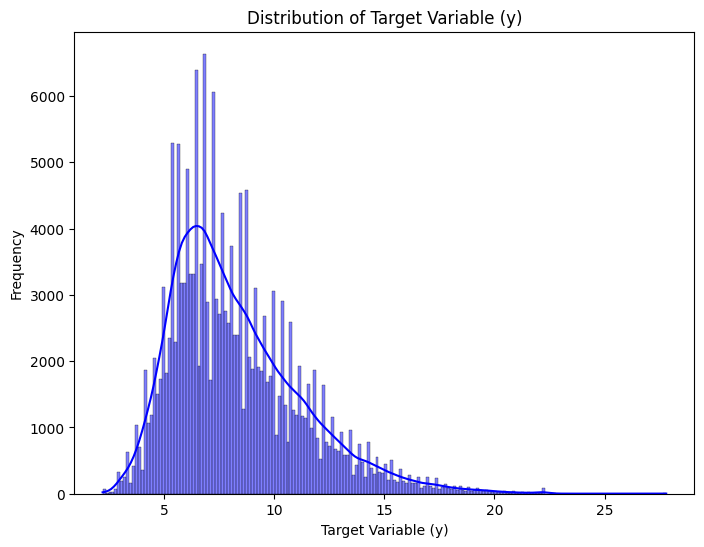

Skewness of Target Variable (y) before transformation: 1.07


In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram
plt.figure(figsize=(8, 6))
sns.histplot(train_df['bg+1:00'], kde=True, color='blue')
plt.title('Distribution of Target Variable (y)')
plt.xlabel('Target Variable (y)')
plt.ylabel('Frequency')
plt.show()

# Calculate skewness
skewness_value = skew(train_df['bg+1:00'])
print(f"Skewness of Target Variable (y) before transformation: {skewness_value:.2f}")

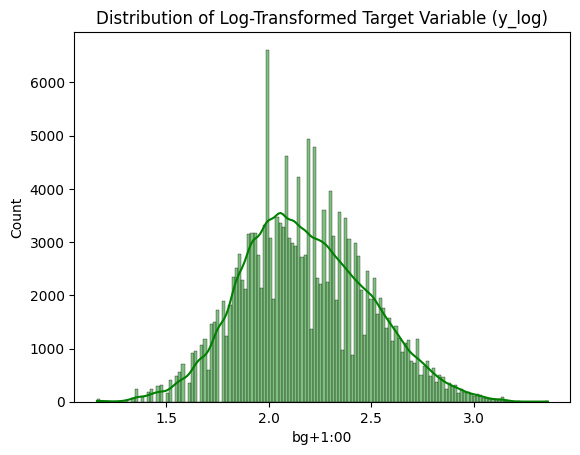

Skewness after Log Transformation: 0.21


In [50]:
# Log transformation
train_df['bg+1:00'] = np.log1p(train_cleaned['bg+1:00'])

# Plot histogram of transformed target
sns.histplot(train_df['bg+1:00'], kde=True, color='green')
plt.title('Distribution of Log-Transformed Target Variable (y_log)')
plt.show()

# Check skewness after transformation
log_skewness_value = skew(train_df['bg+1:00'])
print(f"Skewness after Log Transformation: {log_skewness_value:.2f}")


### **Splitting Data into Features and Target**

The first step in preparing the data for machine learning is separating the target variable (`bg+1:00`) from the features. The target variable represents the blood glucose measurement for the next hour, which we aim to predict. The remaining columns are used as the input features for the model.

#### **Code Explanation:**

1. **Separating Features and Target:**
   - `X`: This is the feature matrix created by dropping the target column (`bg+1:00`) and the participant number column (`p_num`) from the DataFrame.
   - `y`: This is the target vector, which contains the values from the `bg+1:00` column.

2. **Splitting the Data into Training and Validation Sets:**
   - The dataset is split into training and validation sets using `train_test_split` from `sklearn.model_selection`.
   - The `test_size=0.2` argument indicates that 20% of the data will be used for validation, while the remaining 80% will be used for training.
   - `random_state=42` ensures reproducibility of the split.

In [51]:
X = train_df.drop(['bg+1:00', 'p_num'], axis=1)
y = train_df['bg+1:00']
groups = train_df['p_num']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2 , random_state = 42)

In [53]:
from sklearn.preprocessing import RobustScaler

# Initialize RobustScaler
scaler = RobustScaler()

# Apply the scaler to the features
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Verify the scaling
X_train_scaled[:2]


array([[ 0.35355339, -0.61237244, -0.31578947, -0.34210526, -0.36842105,
        -0.39473684, -0.42105263, -0.44736842, -0.47368421, -0.47368421,
        -0.5       , -0.52631579, -0.52631579, -0.48717949, -0.60556258,
        -0.9216182 , -0.9216182 , -0.9216182 , -0.9216182 , -0.9216182 ,
        -0.9216182 , -0.9216182 , -0.9216182 , -0.9216182 , -0.9216182 ,
         0.65865992, -0.29137116, -0.31205674, -0.24113475, -0.25886525,
        -0.24113475, -0.2155477 , -0.26501767, -0.2614841 , -0.2155477 ,
        -0.13427562, -0.15194346, -0.1024735 ,  0.25806452,  0.25723473,
         0.25806452,  0.25806452,  0.25396825,  0.25396825,  0.25806452,
         0.25396825,  0.25477707,  0.25806452,  0.25316456,  0.25396825],
       [ 0.61237244, -0.35355339,  0.        , -0.02631579, -0.05263158,
        -0.10526316, -0.07894737, -0.05263158, -0.07894737, -0.07894737,
        -0.13157895, -0.07894737, -0.13157895, -0.20512821,  0.65865992,
        -0.9216182 ,  0.3426043 ,  0.3426043 ,  4.

In [54]:
y

0         2.667228
1         2.624669
2         2.803360
3         2.760010
4         2.617396
            ...   
177019    2.493205
177020    2.476538
177021    2.459589
177022    2.442347
177023    2.415914
Name: bg+1:00, Length: 177024, dtype: float64

### **Inspecting the Shape of the Training and Validation Data**

After splitting the dataset into features (`X`) and target (`y`), and further dividing them into training and validation sets, it's important to verify the shape of the resulting datasets. This ensures that the split was performed correctly and that we have the expected number of samples in both sets.

#### **Code Explanation:**

The following code prints the shape of the training and validation data:

1. **Training Data (`X_train`):** This will contain 80% of the data for model training.
2. **Validation Data (`X_val`):** This will contain the remaining 20% of the data, which will be used for model evaluation.


In [55]:

print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")

Training data shape: (141619, 50)
Validation data shape: (35405, 50)


### **Training the Stacking Model**

In this step, we create and train a stacking model using multiple base regressors and a meta-model. The stacking model combines the predictions of multiple base models to improve performance by learning from their collective predictions.

#### **Code Explanation:**

1. **Base Estimators (Base Models):**
   - We define a list of base estimators that will be used in the stacking model. These include:
     - **XGBoost (XGBRegressor):** A gradient boosting model using GPU for faster training.
     - **LightGBM (LGBMRegressor):** Another gradient boosting model, also leveraging GPU.
     - **CatBoost (CatBoostRegressor):** A gradient boosting model, utilizing GPU for faster computation.
   
2. **Meta-Model (Final Estimator):**
   - **Ridge Regression:** This linear regression model is used as the meta-model, which takes the predictions from the base models as input and combines them to make the final prediction.

3. **StackingRegressor:**
   - The stacking model is created using the `StackingRegressor` class, which accepts the list of base estimators and the final estimator (meta-model).
   - The `cv=5` (by defult)parameter indicates that 5-fold cross-validation is used during training to improve the model's generalization.

4. **Dropping `p_num`:**
   - If the column `p_num` exists in the training data, it is dropped as it is not needed for the model (i.e., it's not a feature for prediction).

5. **Model Training:**
   - The stacking model is trained using the `fit` method on the training dataset (`X_train`, `y_train`), which includes the features and target variable.


In [56]:
import numpy as np
import pickle
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.ensemble import StackingRegressor, RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

# Define base estimators with GPU configurations
estimators = [
    ('xgb', XGBRegressor(random_state=42, n_estimators=7000, tree_method = 'hist')),
    ('lgbm', LGBMRegressor(random_state=42, n_estimators=7000, verbose=-1)),
    ('catboost', CatBoostRegressor(random_state = 42, iterations= 7000, verbose=1000)),
]

# Meta-model (Ridge)
meta_model = Ridge(alpha=0.1)

# Create StackingRegressor
stacking_model = StackingRegressor(estimators=estimators, final_estimator=meta_model)



# Train the stacking model
print("\nTraining the stacking model...")
stacking_model.fit(X_train_scaled, y_train)  # Train on the training set



Training the stacking model...
Learning rate set to 0.018407
0:	learn: 0.3047722	total: 86.9ms	remaining: 10m 8s
1000:	learn: 0.2060512	total: 25s	remaining: 2m 29s
2000:	learn: 0.1984124	total: 49.2s	remaining: 2m 2s
3000:	learn: 0.1930924	total: 1m 13s	remaining: 1m 37s
4000:	learn: 0.1888042	total: 1m 37s	remaining: 1m 12s
5000:	learn: 0.1850575	total: 2m 1s	remaining: 48.6s
6000:	learn: 0.1816839	total: 2m 25s	remaining: 24.3s
6999:	learn: 0.1786612	total: 2m 50s	remaining: 0us
Learning rate set to 0.01777
0:	learn: 0.3052097	total: 31.5ms	remaining: 3m 40s
1000:	learn: 0.2064894	total: 21.6s	remaining: 2m 9s
2000:	learn: 0.1983654	total: 42.4s	remaining: 1m 45s
3000:	learn: 0.1927179	total: 1m 3s	remaining: 1m 24s
4000:	learn: 0.1880471	total: 1m 25s	remaining: 1m 3s
5000:	learn: 0.1839956	total: 1m 46s	remaining: 42.4s
6000:	learn: 0.1803388	total: 2m 7s	remaining: 21.2s
6999:	learn: 0.1769498	total: 2m 28s	remaining: 0us
Learning rate set to 0.01777
0:	learn: 0.3050435	total: 2

StackingRegressor(estimators=[('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_ra...
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=7000, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...)),
                              ('lgbm',
                               LGBMRegressor(n_estimators=7000, random_state=42,
                                             verbose=-1)),
                              ('catboost',
                               <catboost.core.CatBoostRegressor object at 0x789868eb3d30>)],
                  final_estimator=Ridge(alpha=0.1))

-------

### **Evaluating the Stacking Model**

After training the stacking model, we evaluate its performance on the validation set using various metrics to determine how well it generalizes to unseen data.

#### **Calculating Evaluation Metrics:**

1. **Root Mean Squared Error (RMSE):**  
   This metric calculates the square root of the mean squared error (MSE), which measures the average magnitude of the prediction errors. It provides an idea of how much the predicted values deviate from the actual values.

2. **Mean Absolute Error (MAE):**  
   This metric calculates the average of the absolute differences between predicted and actual values. It represents how far off predictions are from the true values, without considering their direction.

3. **R-squared (R²):**  
   This metric indicates how well the model explains the variability of the data. A higher R² value means a better fit of the model to the data.

#### **Saving the Trained Model:**

The trained stacking model is saved using the `pickle` module. This allows the model to be loaded and used for predictions in the future without needings 'stacking_model.pkl'")


In [57]:
# Make predictions on the validation set (log scale)
y_val_pred_log = stacking_model.predict(X_val_scaled)

# Inverse the log transformation to get predictions in the original scale
y_val_pred = np.expm1(y_val_pred_log)
# Inverse the log transformation on y_val to bring it to the original scale
y_val_original = np.expm1(y_val)

# Calculate validation metrics
rmse_val = np.sqrt(mean_squared_error(y_val_original, y_val_pred))  # RMSE
mae_val = mean_absolute_error(y_val_original, y_val_pred)           # MAE
r2_val = r2_score(y_val_original, y_val_pred)                       # R²

# Print validation metrics
print(f"\nStacking Model Validation Metrics:")
print(f"RMSE: {rmse_val:.4f}")
print(f"MAE: {mae_val:.4f}")
print(f"R²: {r2_val:.4f}")

# Save the trained stacking model
with open('stacking_model.pkl', 'wb') as f:
    pickle.dump(stacking_model, f)

print("\nTrained stacking model saved as 'stacking_model.pkl'")



Stacking Model Validation Metrics:
RMSE: 1.6901
MAE: 1.2047
R²: 0.6842

Trained stacking model saved as 'stacking_model.pkl'


### **Evaluating the Residuals of the Stacking Model**

To evaluate the performance of the stacking model further, we analyze the residuals (the differences between the actual and predicted values) to check for any patterns or deviations from normality. This can help determine whether the model has any biases or whether its assumptions hold true.

#### **Q-Q Plot of Residuals:**

A **Q-Q (Quantile-Quantile) plot** is a graphical tool used to assess if the residuals follow a normal distribution. In the Q-Q plot:
- The **theoretical quantiles** (from a normal distribution) are plotted against the **sample quantiles** (from the residuals).
- If the points in the plot fall approximately along a straight line, it suggests that the residuals follow a normal distribution.
- Deviations from this straight line indicate departures from normality, which could suggest problems with the model's assumptions.

#### **Code Explanation:**

1. **Calculate Residuals:**  
   The residuals are calculated by subtracting the predicted values (`y_pred_val`) from the actual values (`y_val`) in the validation set.

2. **Plot the Q-Q Plot:**  
   Using the `scipy.stats.probplot()` function, a Q-Q plot is generated to visualize how the residuals compare to a normal distribution. If the points lie close to the diagonal line, the residuals are normally distributed, which is a good sign for
3. **Residuals Plot:**

A **residuals plot** is a scatter plot where the residuals (errors) are plotted against the actual values (`y_val`). This plot helps identify patterns in the residuals:

- **Ideally**, the residuals should be **randomly scattered** around zero, indicating that the model's predictions are unbiased.
- If there is a **pattern** (e.g., a curve or systematic trend), it suggests that the model has not fully captured the data's underlying structure, and there might be **room for improvement**.

The plot provides valuable insights into the model's performance and helps to diagnose potential issues like heteroscedasticity (variance in the residuals), bias, or overfitting.
 les")
plt.grid(True)
plt.show()


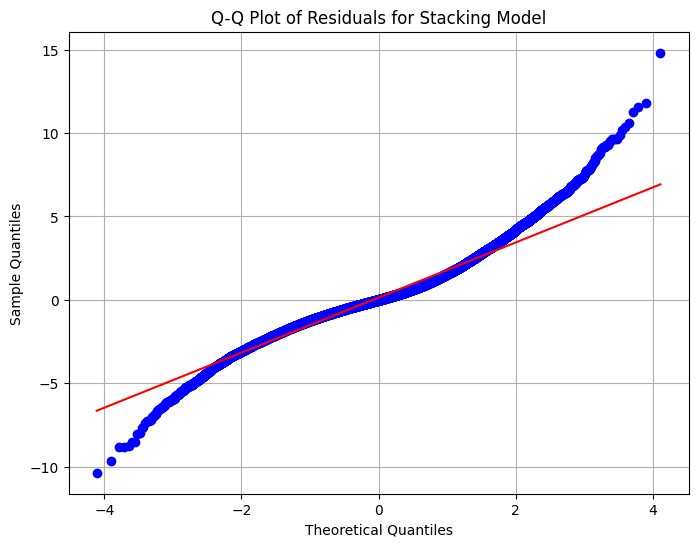

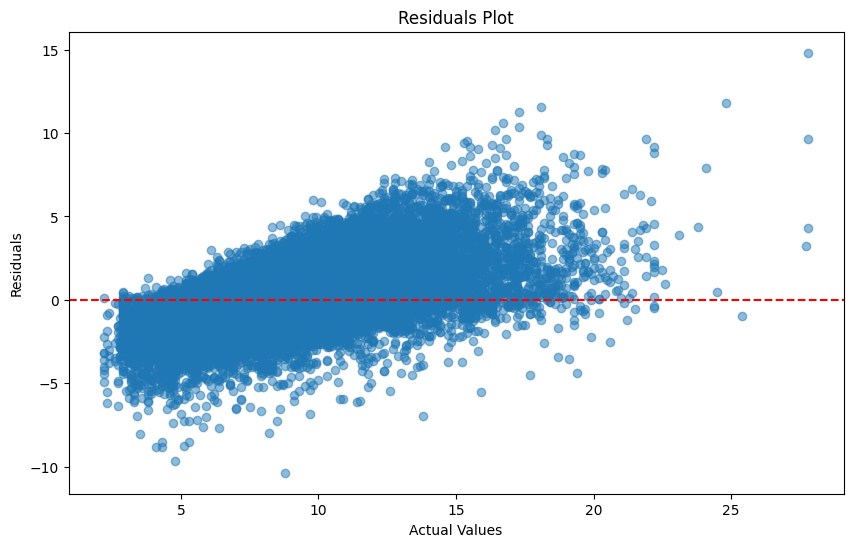

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.metrics import mean_squared_error

# Calculate residuals
residuals = y_val_original - y_val_pred

# Plot the Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals for Stacking Model")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.grid(True)
plt.show()

# plot residuals

plt.figure(figsize=(10, 6))
plt.scatter(y_val_original, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')  #
plt.title("Residuals Plot")
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.show()


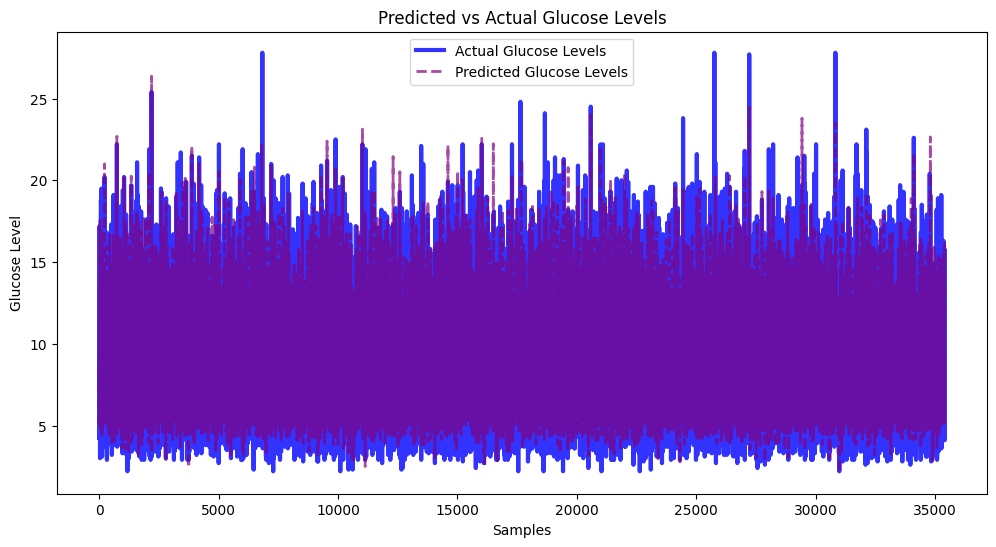

In [62]:
import matplotlib.pyplot as plt

# Visualize Predictions with Adjusted Colors
plt.figure(figsize=(12, 6))

# Actual glucose levels with increased line width and a semi-transparent color
plt.plot(y_val_original.values, label='Actual Glucose Levels', color='blue', linestyle='-', linewidth=3, alpha=0.8)

# Predicted glucose levels with dashed line, different color, and semi-transparent
plt.plot(y_val_pred, label='Predicted Glucose Levels', color='purple', linestyle='--', linewidth=2, alpha=0.7)


plt.xlabel('Samples')
plt.ylabel('Glucose Level')
plt.title('Predicted vs Actual Glucose Levels')
plt.legend()

plt.show()


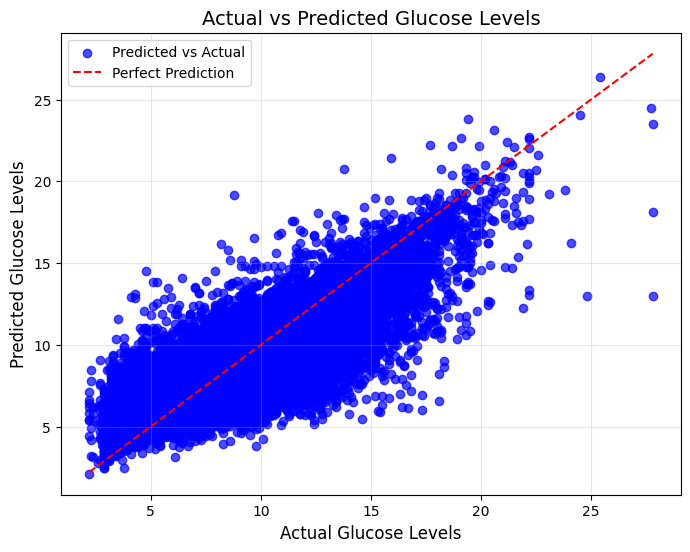

In [65]:
import matplotlib.pyplot as plt
import numpy as np



# Plot actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_val_original, y_val_pred, alpha=0.7, color='blue', label='Predicted vs Actual')
plt.plot([y_val_original.min(), y_val_original.max()], [y_val_original.min(), y_val_original.max()], color='red', linestyle='--', label='Perfect Prediction')

# Add labels, title, and legend
plt.title("Actual vs Predicted Glucose Levels", fontsize=14)
plt.xlabel("Actual Glucose Levels", fontsize=12)
plt.ylabel("Predicted Glucose Levels", fontsize=12)
plt.legend(loc='upper left')
plt.grid(alpha=0.3)
plt.show()


## interference


In [66]:
# Drop the 'p_num' column from the test set
test_df = test_df.drop('p_num', axis=1)
print(f"Test data shape after dropping 'p_num': {len(test_df)}")

# Scale the test data using the same scaler that was used on the training data
test_df_scaled = scaler.transform(test_df)

# Make predictions on the test set (log scale)
y_pred_log = stacking_model.predict(test_df_scaled)

# Inverse the log transformation to get predictions on the original scale
y_pred_test = np.expm1(y_pred_log)
y_pred_test

Test data shape after dropping 'p_num': 3644


array([9.3593689 , 5.37523166, 8.02583304, ..., 6.74799035, 8.06258529,
       6.63615048])

In [67]:
import pandas as pd

# Check the length of y_pred_test to make sure it matches sample['id']
print(f"Length of y_pred_test: {len(y_pred_test)}")
print(f"Length of test_id['id']: {len(sample['id'])}")

# Ensure the y_pred_test matches the length of sample['id']
if len(y_pred_test) == len(sample['id']):
    # Create the submission DataFrame
    submission_df = pd.DataFrame({
        'id': sample['id'],  # Using the 'id' from the sample DataFrame
        'bg+1:00': y_pred_test  # Predictions from the model
    })

    # Display the first few rows of the submission DataFrame to verify
    print(submission_df.head())

    # Save the submission to a CSV file
    submission_df.to_csv('submission.csv', index=False)
    print(f'Submission file saved successfully.')
else:
    print(f"Error: The length of y_pred_test does not match the length of sample['id']")

Length of y_pred_test: 3644
Length of test_id['id']: 3644
         id   bg+1:00
0  p01_8459  9.359369
1  p01_8460  5.375232
2  p01_8461  8.025833
3  p01_8462  9.704736
4  p01_8463  7.438439
Submission file saved successfully.


------